0.321459414641


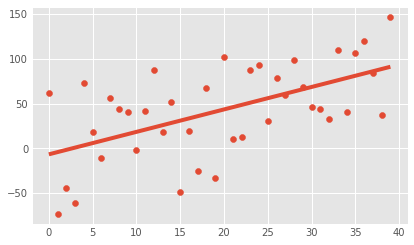

In [102]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
%matplotlib inline
style.use('ggplot')

#x = np.array([1,2,3,4,5, 6], dtype=np.float64)
#y = np.array([5,4,6,5,6, 7], dtype=np.float64)

def create_dataset(hm, variance, step=2, correlation=False):
    val=1
    y=[]
    for i in range(hm):
        ys=val+random.randrange(-variance, variance)
        y.append(ys)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and  correlation == 'neg':
            val-=step
    x=[i for i in range(len(y))]
    return np.array(x, dtype=np.float64), np.array(y, dtype=np.float64)

def best_fit_slope_intercept(x, y):
    m=(((mean(x)*mean(y)) - mean(x*y))/
       ((mean(x)*mean(x)) - mean(x*x)))
    b= mean(y) - m*mean(x)
    return m, b

def squared_error(y_orig, y_line):
    return sum((y_line - y_orig) * (y_line - y_orig))

def COD(y_orig, y_line):
    y_mean_line = [mean(y_orig) for y in y_orig]
    squared_error_reg = squared_error(y_orig, y_line)
    squared_error_mean = squared_error(y_orig, y_mean_line)
    return 1 - (squared_error_reg / squared_error_mean)

x, y=create_dataset(40, 80, 2, correlation='pos')

m, b = best_fit_slope_intercept(x, y)

regression_line=[(m*t)+b for t in x]

r_squared=COD(y, regression_line)

print(r_squared)
plt.scatter(x, y)
plt.plot(x, regression_line)
plt.show()